In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')

In [17]:
pd.read_csv('test/pdb_data_no_dups.csv').to_pickle('test/pdb_data_no_dups.pickle')
pd.read_csv('test/pdb_data_seq.csv').to_pickle('test/pdb_data_seq.pickle')

In [19]:
df_dup_raw = pd.read_pickle('test/pdb_data_no_dups.pickle')
df_seq_raw = pd.read_pickle('test/pdb_data_seq.pickle')

In [31]:
merged_df = pd.merge(df_dup_raw,df_seq_raw, on = 'structureId',how='inner')

In [81]:
missing_df = pd.DataFrame(merged_df.isnull().sum().sort_values(ascending=False)/merged_df.shape[0] * 100).reset_index()
missing_df.columns = ['Name', 'Missingness(%)']
missing_df

,Name,Missingness(%)
0,crystallizationMethod,33.194382
1,crystallizationTempK,32.569739
2,phValue,27.688693
3,pdbxDetails,18.185542
4,densityMatthews,17.298986
5,densityPercentSol,17.272880
6,publicationYear,12.233073
7,macromoleculeType_y,7.592078
8,macromoleculeType_x,7.592078
9,resolution,4.597909


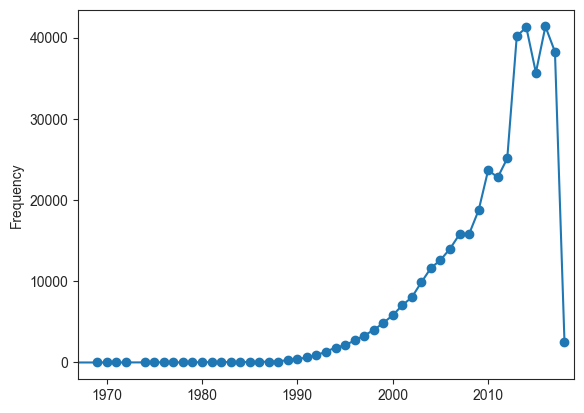

In [137]:
pub_df = merged_df.dropna(subset='publicationYear')
pub_df_x = pub_df.publicationYear.value_counts().sort_index().index
pub_df_y = pub_df.publicationYear.value_counts().sort_index().values
plt.plot(pub_df_x, pub_df_y, marker='o', linestyle='-')
plt.xlim(1967,2019)
plt.ylabel('Frequency')
plt.show()

In [130]:
pub_df_y

array([    2,     1,     3,     1,     8,    10,    15,    20,    13,
          11,    10,    38,    34,    63,    48,    54,    62,    62,
         116,   119,   318,   421,   618,   910,  1332,  1844,  2116,
        2723,  3315,  3999,  4862,  5827,  7045,  8038,  9885, 11638,
       12619, 14009, 15792, 15819, 18751, 23695, 22793, 25135, 40213,
       41263, 35693, 41377, 38263,  2510])

In [127]:
pub_df['publicationYear']

0         1994.0
1         1994.0
2         1995.0
3         1995.0
4         1999.0
           ...  
471144    1989.0
471145    1992.0
471146    1992.0
471147    1992.0
471148    1992.0
Name: publicationYear, Length: 413513, dtype: float64